In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis')
os.getcwd()

'C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis'

In [3]:
#what's my data?
all_files = glob.glob('*.csv')
all_files

['allergies.csv',
 'careplans.csv',
 'concepts.csv',
 'conditions.csv',
 'encounters.csv',
 'imaging_studies.csv',
 'immunizations.csv',
 'medications.csv',
 'observations.csv',
 'organizations.csv',
 'patients.csv',
 'patients_updated.csv',
 'procedures.csv',
 'providers.csv']

### Summary
-  Uptill now, we found people in Massandapolis were suferring from addiction related issues in the 1990s which claimed a lot of lives. I want to understand how fit the people were?
- For that, we'll look at immunizations and observations table and analyze the health paramters for different patients and analyze how many individuals were vaccinated and how many weren't.




In [4]:
observations = pd.read_csv('observations.csv')
observations.columns = [i.lower() for i in observations.columns]
observations.info()
observations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199998 entries, 0 to 3199997
Data columns (total 8 columns):
date           object
patient        object
encounter      object
code           object
description    object
value          object
units          object
type           object
dtypes: object(8)
memory usage: 195.3+ MB


,date,patient,encounter,code,description,value,units,type
0,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8302-2,Body Height,55.2,cm,numeric
1,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.4,{score},numeric
2,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,29463-7,Body Weight,4.3,kg,numeric
3,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8462-4,Diastolic Blood Pressure,74.6,mm[Hg],numeric
4,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8480-6,Systolic Blood Pressure,128.2,mm[Hg],numeric


In [5]:
#lets first fix our columns
observations.date = observations.date.apply(pd.to_datetime)

In [6]:
observations.value.value_counts().nlargest(5)

Never smoker     115279
Former smoker     47830
1.0               18898
3.9               16825
4.0               15436
Name: value, dtype: int64

In [7]:
#we also have textual values in the "value" column
observations.loc[(observations.value == 'Never smoker') | (observations.value == 'Former smoker'),'description'].value_counts()

Tobacco smoking status NHIS    163109
Name: description, dtype: int64

In [8]:
observations.isna().sum()

date                0
patient             0
encounter           0
code                0
description         0
value              29
units          169450
type                0
dtype: int64

In [9]:
#lets see how many different metrics do we have in total
observations.description.value_counts().nlargest(60)

Pain severity - 0-10 verbal numeric rating [Score] - Reported                217754
Diastolic Blood Pressure                                                     165138
Systolic Blood Pressure                                                      165138
Body Weight                                                                  163795
Tobacco smoking status NHIS                                                  163795
Body Height                                                                  163795
Body Mass Index                                                              150086
Chloride                                                                      97070
Urea Nitrogen                                                                 97070
Calcium                                                                       97070
Carbon Dioxide                                                                97070
Sodium                                                                      

In [10]:
#How many rows are there for every patient?
observations.groupby('patient').size().sort_values(ascending = False).nlargest(10)

patient
e303fe35-bda1-4112-a74c-a916025b3152    17841
2b4079aa-99e2-4228-9d13-9e14f67070e8    16717
ee16ecac-29a0-453f-87dc-a1672879febe    15985
a9aedadc-8633-4578-8b1b-295af0d7afcd    15791
7a947108-2bd6-4245-92e3-e8a5125f8f24    14894
9c4713b1-936f-415d-aaee-1b059e015d88    14573
58d6ab43-5e3d-4b5c-98f5-473a8b18e1f0    13731
569567c5-1c28-4997-8034-340b2ad91e36    11883
141a5be4-cf95-43b0-b4e6-76d24b14f936     8941
d4c4c658-770c-48d3-9497-61f546f5e620     7852
dtype: int64

Woah! 17k values for 1 patient. Surely there have to be duplicated values.

In [11]:
#Lets see how many duplicated rows are we dealing here
len(observations.loc[observations.duplicated()])

195

In [12]:
observations.drop_duplicates(inplace = True)

To look at individual health, we need to assess a few health parameters. Looking at the distribution of description column, lets look at blood pressure, body weight, height and BMI values.

In [13]:
#before aggregating lets also include patient's DOB
patients = pd.read_csv('patients_updated.csv')
patients.birthdate = patients.birthdate.apply(pd.to_datetime) 
observations1 = pd.merge(observations,patients[['id','birth_year']],left_on = 'patient',right_on = 'id',how = 'left')

In [14]:
observations1.head()

,date,patient,encounter,code,description,value,units,type,id,birth_year
0,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8302-2,Body Height,55.2,cm,numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
1,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.4,{score},numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
2,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,29463-7,Body Weight,4.3,kg,numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
3,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8462-4,Diastolic Blood Pressure,74.6,mm[Hg],numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
4,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8480-6,Systolic Blood Pressure,128.2,mm[Hg],numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013


In [15]:
def get_health_metrics(list_of_val):
    health_parameters = observations1.loc[observations1.description.isin(list_of_val),['date','patient','description','value','birth_year']]
    health_parameters['checkup_year'] = health_parameters.date.dt.year
    health_parameters['current_age'] = -(health_parameters.birth_year - health_parameters.checkup_year)
    health_parameters.value = health_parameters.value.astype('float') 
    patient_health = health_parameters.pivot_table(index = ['checkup_year','patient','current_age'],columns = 'description',values = 'value',aggfunc = np.mean)
    #lets subset our population with only adults (aged 18 and above)
    adults_health = patient_health.loc[patient_health.index.get_level_values(level = 'current_age') >= 18]
    return adults_health

## Basic Health Metrics

In [16]:
basic_metrics = get_health_metrics(['Diastolic Blood Pressure','Systolic Blood Pressure','Body Weight','Body Mass Index'])
basic_metrics.head()

description                                                    Body Mass Index  \
checkup_year patient                              current_age                    
1926         9e12d201-4987-4f50-b77a-37dc540877fc 18                      27.0   
1927         2c82dfbd-c7c6-4caf-8450-b5795a1846af 18                      19.9   
             9e12d201-4987-4f50-b77a-37dc540877fc 19                      27.5   
1928         28c0b9bc-9eb7-4eb7-b796-0978460a21eb 18                      21.8   
             2c82dfbd-c7c6-4caf-8450-b5795a1846af 19                      20.3   

description                                                    Body Weight  \
checkup_year patient                              current_age                
1926         9e12d201-4987-4f50-b77a-37dc540877fc 18                  70.8   
1927         2c82dfbd-c7c6-4caf-8450-b5795a1846af 18                  54.4   
             9e12d201-4987-4f50-b77a-37dc540877fc 19                  72.9   
1928         28c0b9bc-9eb7-4eb7-b796-0978460a21eb 18                  52.3   
             2c82dfbd-c7c6-4caf-8450-b5795a1846af 19                  55.4   

description                                                    Diastolic Blood Pressure  \
checkup_year patient                              current_age                             
1926         9e12d201-4987-4f50-b77a-37dc540877fc 18                               72.4   
1927         2c82dfbd-c7c6-4caf-8450-b5795a1846af 18                               72.9   
             9e12d201-4987-4f50-b77a-37dc540877fc 19                               86.5   
1928         28c0b9bc-9eb7-4eb7-b796-0978460a21eb 18                               76.0   
             2c82dfbd-c7c6-4caf-8450-b5795a1846af 19                               78.6   

description                                                    Systolic Blood Pressure  
checkup_year patient                              current_age                           
1926         9e12d201-4987-4f50-b77a-37dc540877fc 18                             127.9  
1927         2c82dfbd-c7c6-4caf-8450-b5795a1846af 18                             104.9  
             9e12d201-4987-4f50-b77a-37dc540877fc 19                             114.4  
1928         28c0b9bc-9eb7-4eb7-b796-0978460a21eb 18                             110.6  
             2c82dfbd-c7c6-4caf-8450-b5795a1846af 19                             120.2

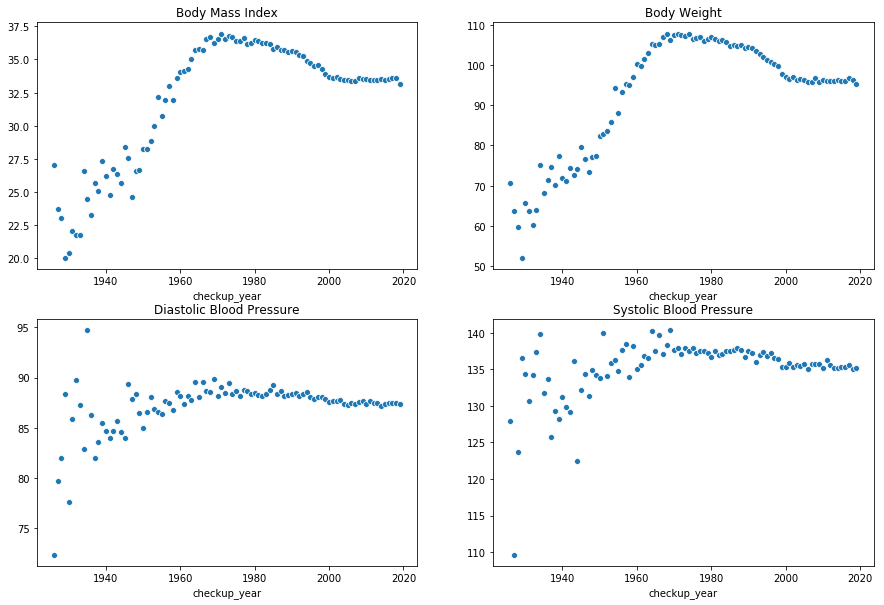

In [17]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
ax = [j for i in ax for j in i]
for i, col in enumerate(basic_metrics.columns):
    col_metrics = basic_metrics.groupby(basic_metrics.index.get_level_values(level = 'checkup_year'))[col].mean()
    sns.scatterplot(col_metrics.index,col_metrics.values,ax = ax[i])
    ax[i].set_title(col)


Ok. Clearly there are a lot of health problems in Massandapolis.

### Observations:

- Since, 1960s, the general population has been obese with BMIs ranging between 32-37. (A healthy person should have somewhere between 20-25 BMI). This is also indicated through body weight, where people are weighing between 100-110 kgs on average.
- Blood pressure levels also seem to be consistently high. Diastolic BP should ideally be in the range 60-80 and Systolic BP in range 90-120. 
- Although, we see a decline in body weight after 200s, but BP levels seem to be consistently high.

Additional inference - 
- Apart from addiction issues, people in Massandapolis also seem to suffering from other health issues (Obesity/ Diabetes/ Hyptertension).

## Cholestrol levels 

In [18]:
basic_metrics = get_health_metrics(['Low Density Lipoprotein Cholesterol','Total Cholesterol','Triglycerides','High Density Lipoprotein Cholesterol'])

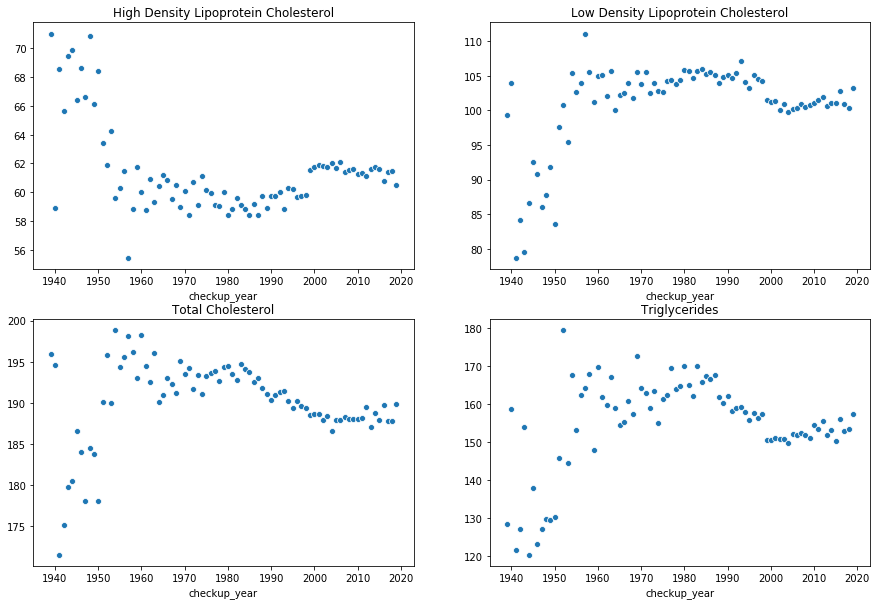

In [19]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
ax = [j for i in ax for j in i]
for i, col in enumerate(basic_metrics.columns):
    col_metrics = basic_metrics.groupby(basic_metrics.index.get_level_values(level = 'checkup_year'))[col].mean()
    sns.scatterplot(col_metrics.index,col_metrics.values,ax = ax[i])
    ax[i].set_title(col)

- Total cholestrol - Although total cholestrol level seems to be in the normal range, it is borderline (normal range is between 125-200, and we are seeing consistently 190s.)
- HDL (or good cholestrol) - This seems to be fine. (should be 40 mg/dL or higher)
- LDL (or bad cholestrol) - This should be less than 100 mg/dL for both men and women. We see an issue of high bad cholestrol levels. This can lead to serious heart conditions as it indicates cholestrol build up and bloackage in arteries.
- Even Triglycerides, which are another form of fat in blood, are borderline high (is between 150 -180 mg/dL, should be below 150 mg/dL.)

### Basic Metabolic Panel

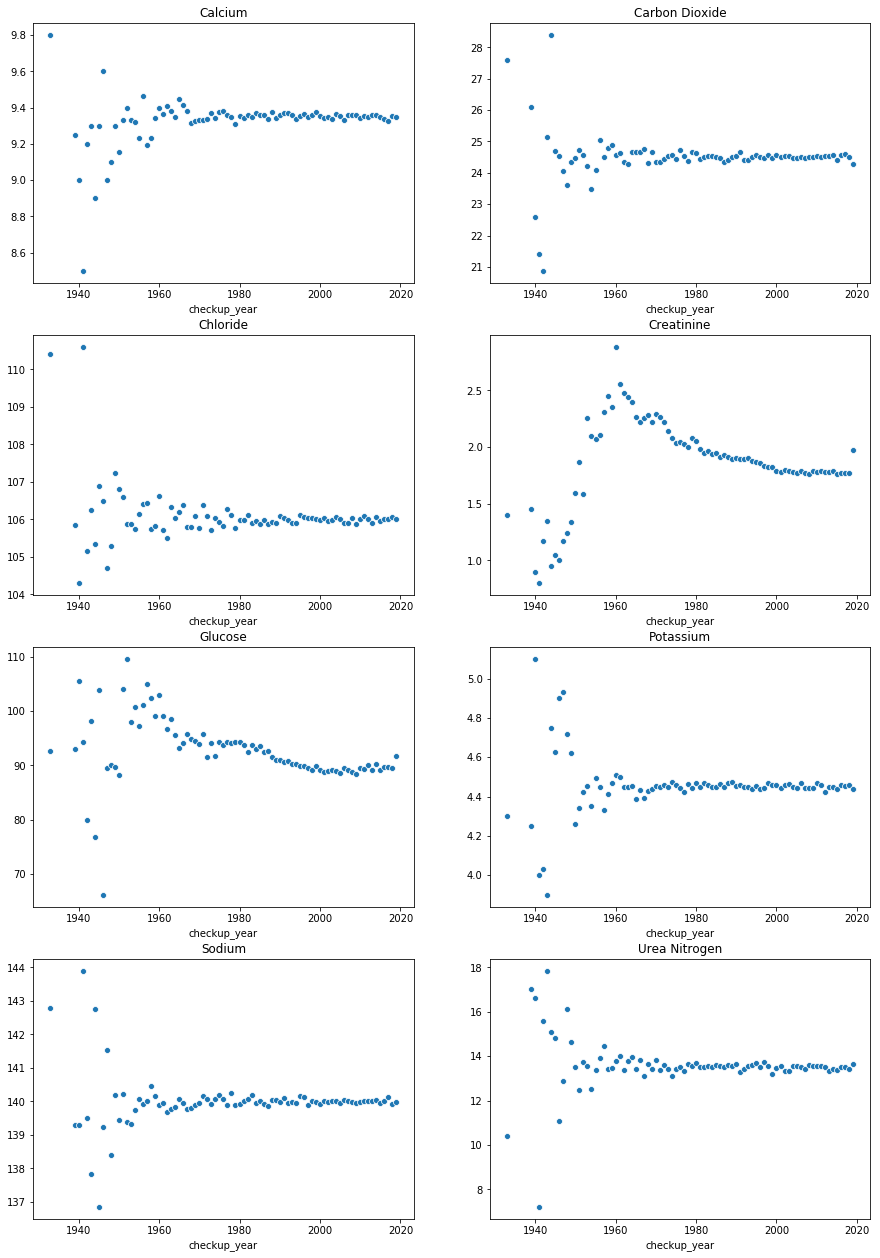

In [20]:
basic_metrics = get_health_metrics(['Glucose','Chloride','Urea Nitrogen','Sodium','Carbon Dioxide','Creatinine','Potassium','Calcium'])
fig,ax = plt.subplots(4,2,figsize = (15,22))
ax = [j for i in ax for j in i]
for i, col in enumerate(basic_metrics.columns):
    col_metrics = basic_metrics.groupby(basic_metrics.index.get_level_values(level = 'checkup_year'))[col].mean()
    sns.scatterplot(col_metrics.index,col_metrics.values,ax = ax[i])
    ax[i].set_title(col)

- The population has a very high chloride. The normal range is between 96-106 mEq/L and it has been borderline levels consistently. This usually indicates de-hydration or kidney issues.
- We also have high Creatinine levels. Creatinine levels are usually in range 0.84 -1.21 and we observe close to 2.0 milligrams/deciliter levels. This could be due to kidney issues or this could be a by-product of diabetes and high blood pressure levels in the body.
- Everything else seems to be under normal ranges.

## Hemoglobin levels

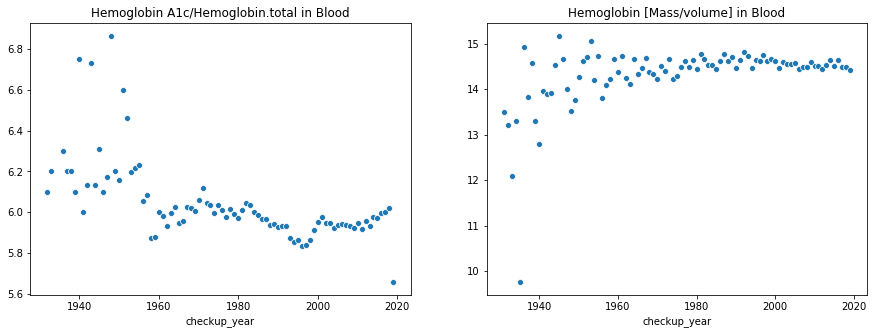

In [21]:
basic_metrics = get_health_metrics(['Hemoglobin A1c/Hemoglobin.total in Blood','Hemoglobin [Mass/volume] in Blood'])
fig,ax = plt.subplots(1,2,figsize = (15,5))
#ax = [j for i in ax for j in i]
for i, col in enumerate(basic_metrics.columns):
    col_metrics = basic_metrics.groupby(basic_metrics.index.get_level_values(level = 'checkup_year'))[col].mean()
    sns.scatterplot(col_metrics.index,col_metrics.values,ax = ax[i])
    ax[i].set_title(col)

- For people without diabetes, the normal range for the hemoglobin A1c level is between 4% and 5.6%. Hemoglobin A1c levels between 5.7% and 6.4% mean you have a higher chance of getting diabetes. Levels of 6.5% or higher mean you have diabetes. Here, looking at HA1C levels, population is definitely prone to diabetes.

To sum up, we saw when analyzing different conditions, people in Massandapolis suffer from lifestyle diseases. Here, we found high cholestrol levels, high blood pressure levels, high BMI and body weight. 

- In addition to Addiction issues that started rising in 1990s, people continually suffer from lifestyle issues, that make them likely to suffer from illnesses like diabetes, heart conditions, kidney issues, and hypertension.

- Next, I want to analyze whether people suffering from these issues had access to healthcare. Were they on medications? Did they have access to healthcare centers? Did, not having access to care cause more deaths?